___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns',100)

import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df = data.copy()

### Exploratory Data Analysis

In [6]:
df.columns= df.columns.str.lower()

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
df.corr()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
v1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,2.125498e-16,2.053457e-16,-2.425603e-17,-5.020280e-16,3.547782e-16,7.212815e-17,-3.879840e-16,3.230206e-17,1.502024e-16,4.654551e-16,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
v2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,1.975426e-16,-9.568710e-17,6.295388e-16,-1.730566e-16,-4.995814e-17,1.177316e-17,-2.685296e-16,3.284605e-16,-7.118719e-18,2.506675e-16,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
v3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,1.576830e-15,6.310231e-16,2.807652e-16,4.739859e-16,9.068793e-16,8.299445e-16,7.614712e-16,1.509897e-16,3.463522e-16,-9.316409e-16,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
v4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,3.459380e-16,-5.625518e-16,1.303306e-16,2.282280e-16,1.377649e-16,-9.614528e-16,-2.699612e-16,-5.103644e-16,-3.980557e-16,-1.857247e-16,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
v5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,7.203963e-16,7.412552e-16,5.886991e-16,6.565143e-16,-8.720275e-16,2.246261e-15,1.281914e-16,5.308590e-16,-1.450421e-16,-3.554057e-16,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
v6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,1.980503e-15,2.375468e-16,-1.211182e-16,2.621312e-16,-1.531188e-15,2.623672e-18,2.015618e-16,1.223814e-16,-1.865597e-16,-1.858755e-16,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
v7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,1.425248e-16,-3.536655e-18,1.266462e-17,2.607772e-16,-1.690540e-16,5.869302e-17,2.177192e-16,7.604126e-17,-1.881008e-16,9.379684e-16,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
v8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,2.487043e-16,1.839891e-16,-2.921856e-16,-8.599156e-16,4.127777e-16,-5.254741e-16,-2.269549e-16,-3.667974e-16,-3.875186e-16,2.033737e-16,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
v9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,1.354680e-16,-1.079314e-15,2.251072e-15,3.784757e-15,

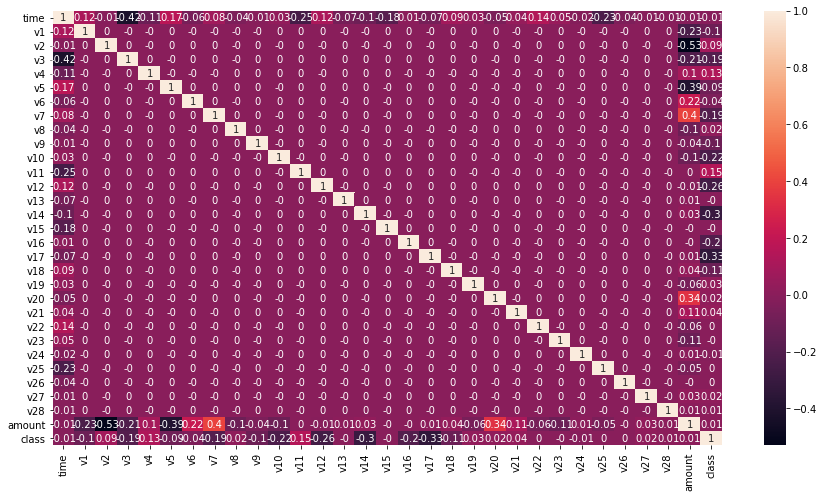

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(round(df.corr(),ndigits=2),annot=True);

In [12]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [13]:
df["class"].value_counts() #only 492 class values are 1

0    284315
1       492
Name: class, dtype: int64

<AxesSubplot:>

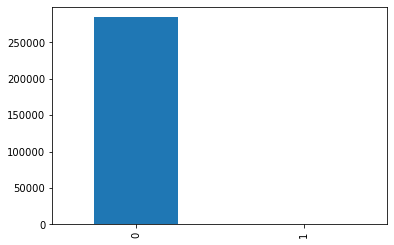

In [14]:
df["class"].value_counts().plot(kind="bar") #highly unbalanced data

In [15]:
df.time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: time, Length: 124592, dtype: int64

In [16]:
df.amount.value_counts()

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
438.10        1
152.29        1
156.45        1
724.44        1
102.77        1
Name: amount, Length: 32767, dtype: int64

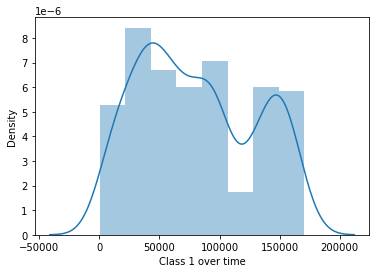

In [17]:
fraud = df[df["class"]==1]
not_fraud = df[df["class"]==0]

sns.distplot(x=fraud["time"],a=fraud)
plt.xlabel("Class 1 over time");

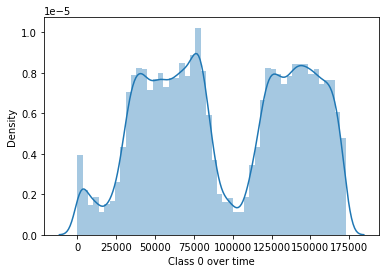

In [18]:
sns.distplot(x=not_fraud["time"],a=not_fraud)
plt.xlabel("Class 0 over time");

In [19]:
df.groupby("class").mean()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
df.groupby("class").min()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0
1,406.0,-30.55238,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.0


In [21]:
df.groupby("class").max()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,172792.0,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16
1,170348.0,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.87


### Data Cleaning
Check Missing Values and Outliers

In [22]:
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,284807


In [23]:
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [24]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [25]:
df

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


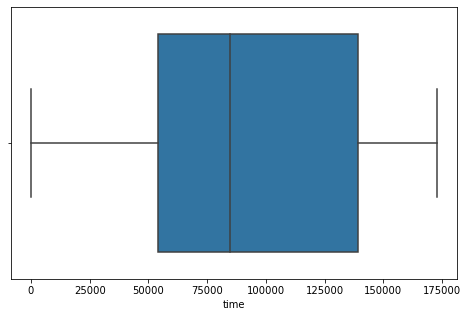

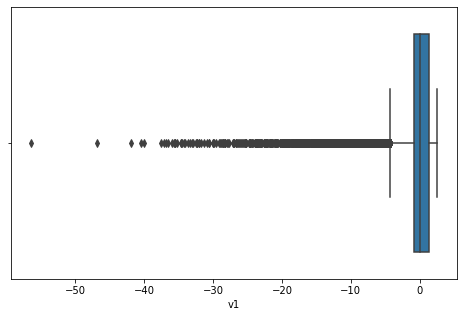

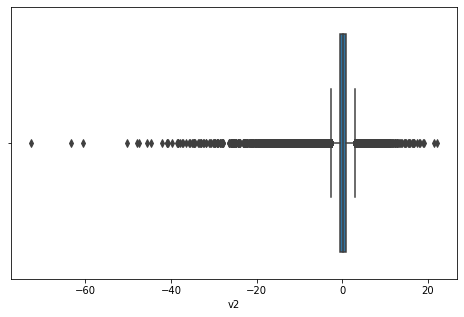

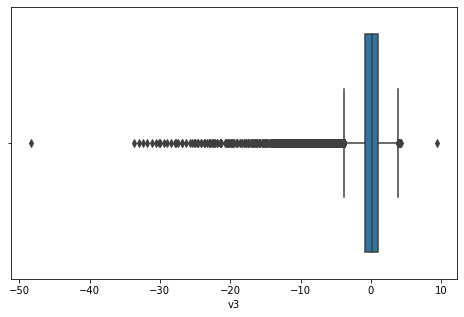

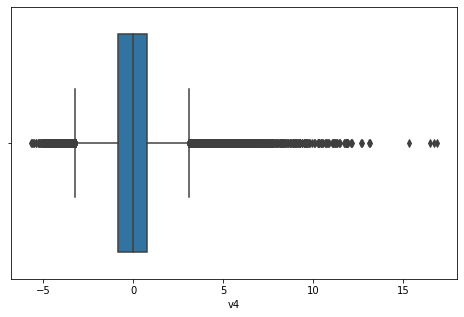

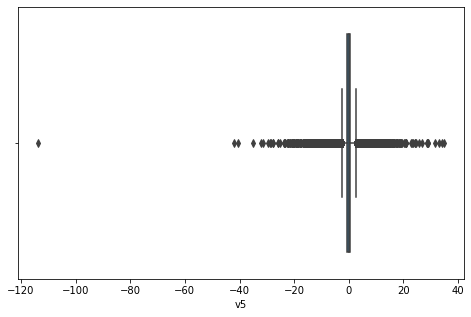

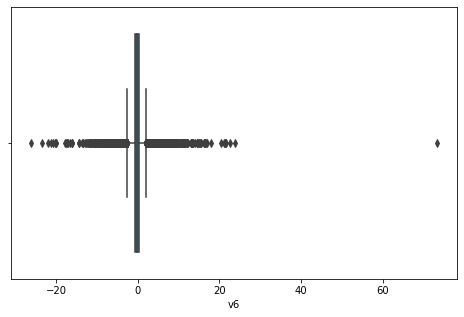

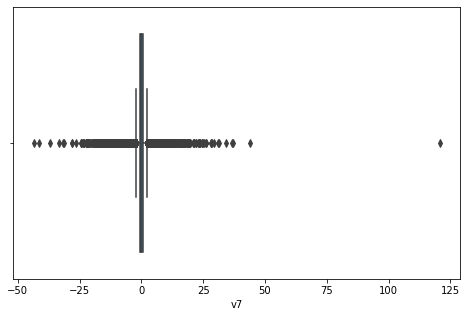

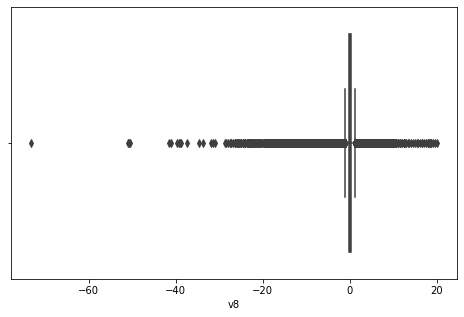

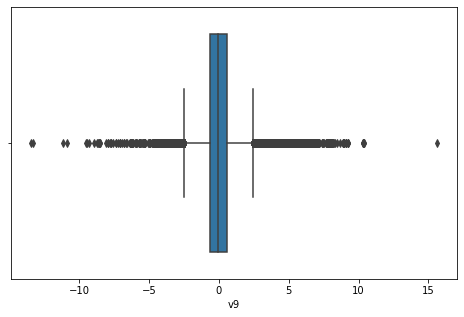

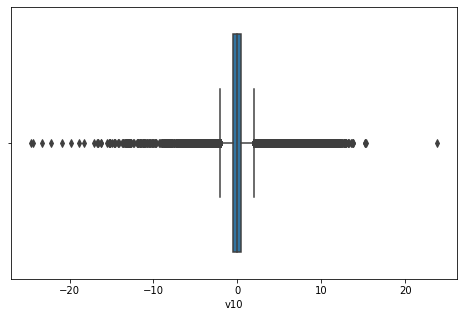

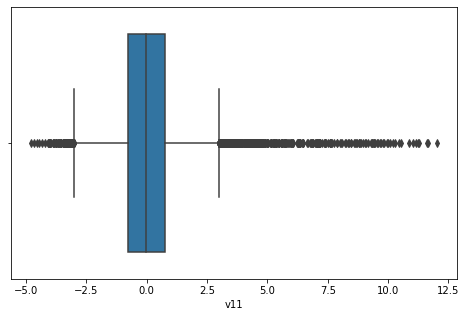

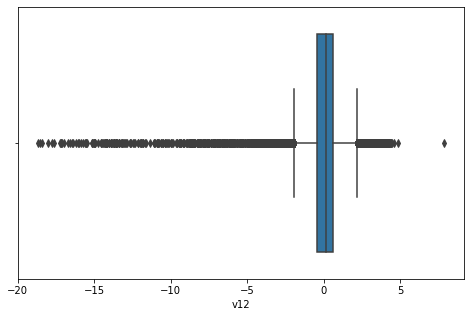

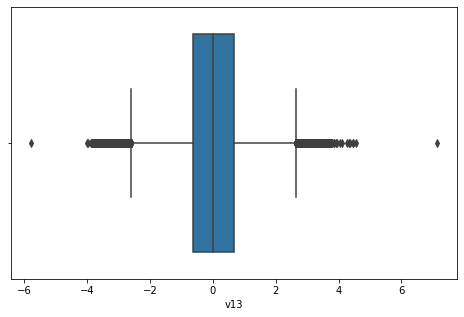

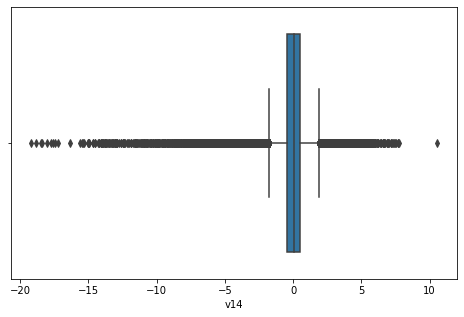

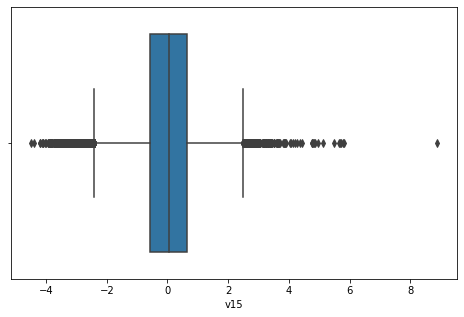

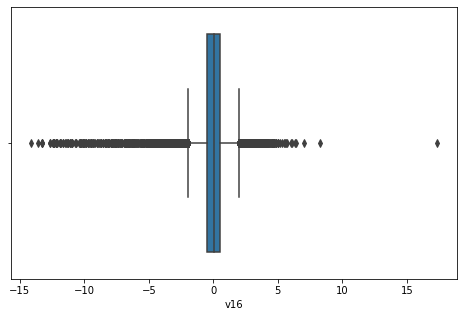

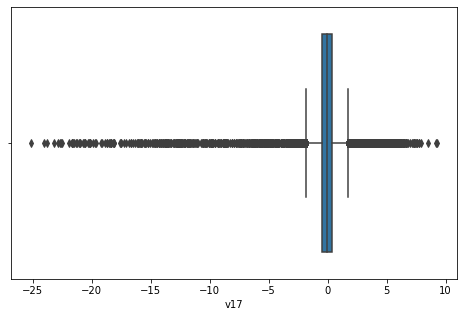

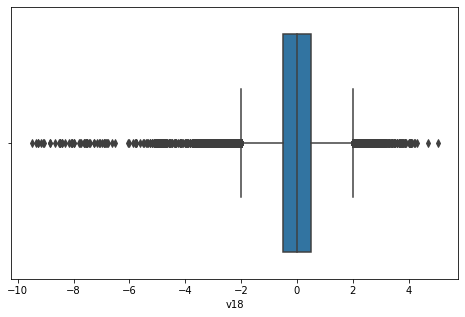

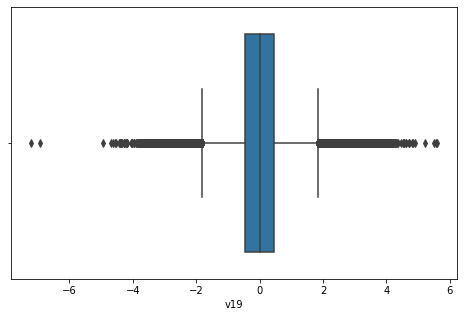

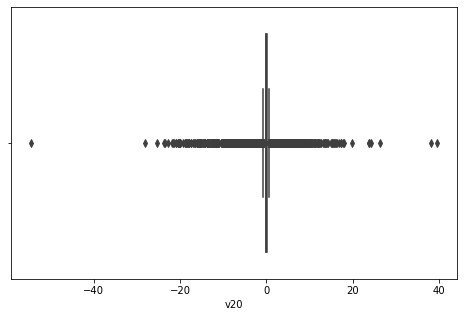

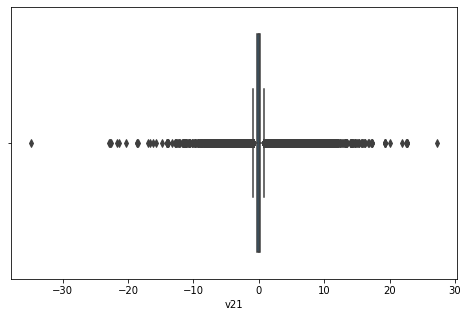

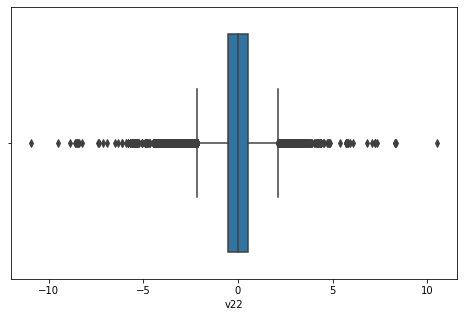

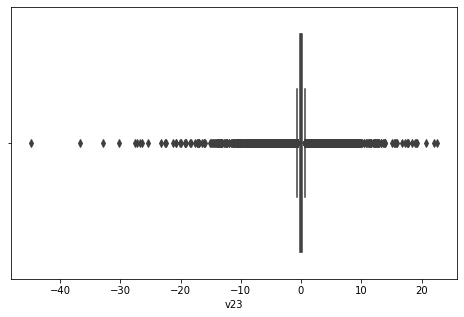

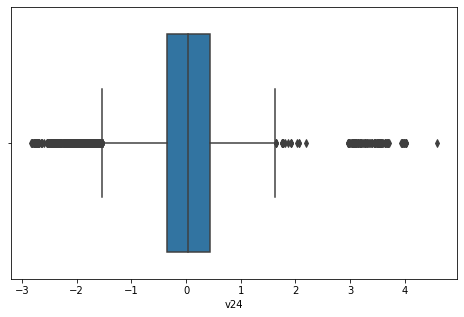

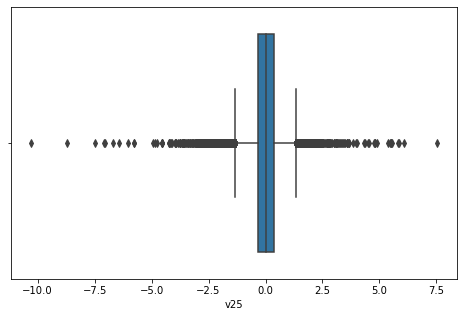

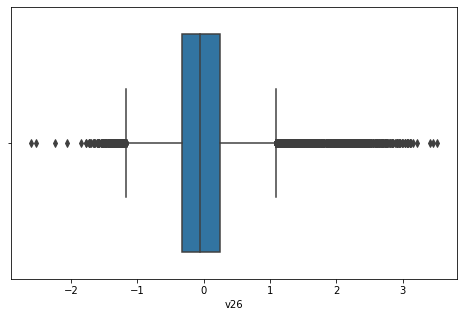

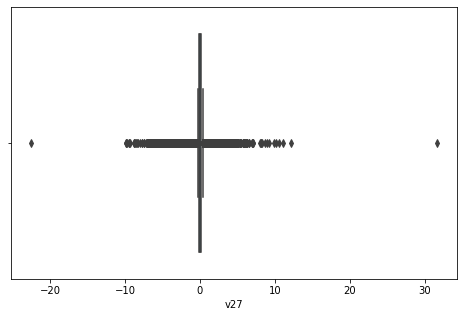

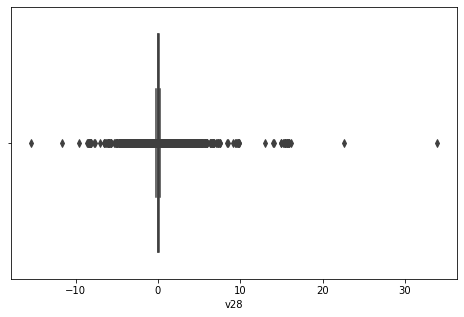

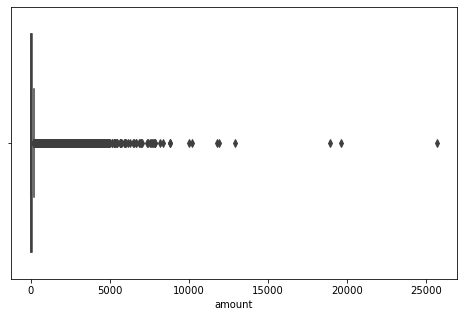

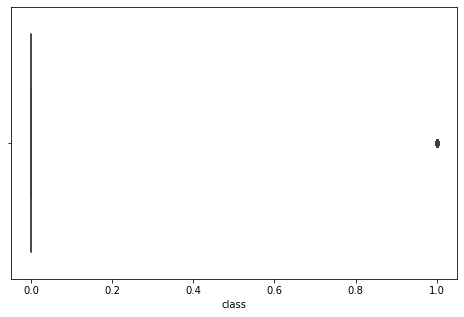

In [26]:
for column in df:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=df, x=column);

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop("class",axis=1)
y=df["class"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

***ii. Model Training***

In [34]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_train)
                                               ,y_train)
class_weight

array([  0.50083469, 300.01208459])

In [35]:
class_weight = {0: 0.50083469 ,1: 300.01208459} #0 7000 1 2000

In [36]:
log_model = LogisticRegression(class_weight=class_weight, random_state=42)

In [37]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.50083469, 1: 300.01208459},
                   random_state=42)

***iii. Prediction and Model Evaluating***

In [38]:
log_model.coef_

array([[-0.25078024,  1.57742671,  0.80613581,  0.43080999,  1.19399283,
         1.06744103, -0.71311809, -0.61262296, -0.48996871, -0.51044125,
        -1.11784802,  0.58530589, -1.25108483, -0.298645  , -1.52902422,
        -0.4095692 , -0.59354258, -0.90205308, -0.26935714,  0.32187376,
        -0.76892284,  0.06915873,  0.61692277,  0.46683344,  0.29242935,
        -0.12274278, -0.14991736, -0.1692677 ,  0.27907827,  2.06896072]])

In [39]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [41]:
test_data = pd.concat([X_test, y_test], axis=1)

In [42]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred"] = y_pred
test_data

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,pred_proba,pred
138805,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,1.376058,1.540308,0.693117,0.019787,0.130297,0.672786,-0.542340,-0.259041,0.050345,0.296603,0.252636,0.099876,0.702279,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,19.45,0,0.005669,0
86044,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,-0.691974,-1.424615,0.187289,0.729575,-0.393678,-0.360989,-0.210956,-0.257742,-0.347665,0.783205,0.043267,-0.209533,-0.489587,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,31.35,0,0.019179,0
93790,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,-0.137806,1.448209,0.552174,-0.475780,0.047778,0.741160,0.508925,-0.059739,-0.065391,-0.138696,-0.134548,-0.237956,-0.716717,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,0.89,0,0.021668,0
123328,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,0.811951,-0.149693,0.699783,1.113520,-0.260753,-0.373348,-0.937595,-0.774998,2.225077,-0.413753,-0.297845,-0.214390,-0.138765,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,83.50,0,0.010309,0
126403,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,0.173870,-0.962828,-0.534526,-0.857532,-0.955275,-0.739601,0.405838,1.157364,-1.717754,0.532613,0.443070,0.253705,0.462592,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,250.00,0,0.056244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,44460.0,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,0.589107,2.308017,1.328085,0.716657,0.606381,0.976724,-2.534300,0.937891,-0.991656,-2.003473,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,279.90,0,0.002021,0
273672,166166.0,2.027942,0.034329,-2.411462,0.160815,0.870687,-1.269340,0.984068,-0.611409,0.190407,-0.099633,-1.084891,0.559101,0.829303,0.679437,0.434459,-0.673921,-0.532389,-0.333971,0.210357,-0.069285,0.184379,0.603199,-0.225128,-0.659959,0.670756,-0.379132,-0.040148,-0.063864,70.00,0,0.022457,0
268146,163558.0,2.030605,0.148455,-1.765004,0.556354,0.135904,-1.471860,0.228982,-0.333116,0.691840,-0.505593,-0.388708,-0.312587,-0.720657,-0.683783,1.034540,0.211524,0.573734,0.544761,-0.517835,-0.237780,0.192819,0.687191,-0.014358,-0.104785,0.211153,-0.096818,-0.004184,-0.029435,11.99,0,0.187941,0
42031,40998.0,0.961080,-0.816486,1.540157,1.011783,-1.196358,1.353506,-1.253677,0.625705,1.655494,-0.363684,0.127790,1.105679,-0.845978,-0.795568,-1.888385,-0.442440,0.348403,-0.147016,0.444069,-0.079521,-0.015309,0.313640,-0.123588,-0.228378,0.305133,0.513930,0.053458,0.018343,59.50,0,0.060541,0


In [43]:
test_data[test_data["class"]==1].sample(20)[["class","pred"]]

,class,pred
41826,1,1
107830,1,0
82744,1,1
56464,1,0
214375,1,1
10442,1,1
130779,1,0
149302,1,1
18710,1,1
58516,1,0


In [44]:
test_data[test_data["class"]==0]["class"].value_counts()

0    84976
Name: class, dtype: int64

In [45]:
test_data[test_data["class"]==0]["pred"].value_counts()

0    82717
1     2259
Name: pred, dtype: int64

In [46]:
test_data[test_data["class"]==1]["class"].value_counts()

1    142
Name: class, dtype: int64

In [47]:
test_data[test_data["class"]==1]["pred"].value_counts()

1    126
0     16
Name: pred, dtype: int64

test scores 
--------------
[[82717  2259]
 [   16   126]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



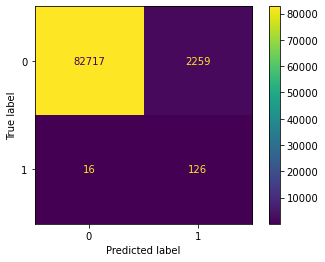

In [48]:
y_pred = log_model.predict(X_test_scaled)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_model,X_test_scaled,y_test,values_format='.0f');

train scores 
--------------
[[193134   5143]
 [    23    308]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    198277
           1       0.06      0.93      0.11       331

    accuracy                           0.97    198608
   macro avg       0.53      0.95      0.55    198608
weighted avg       1.00      0.97      0.99    198608



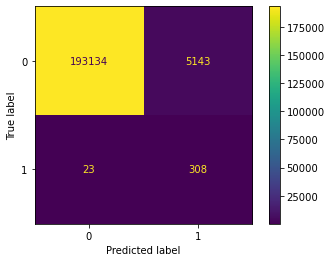

In [49]:
y_pred = log_model.predict(X_train_scaled)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(log_model,X_train_scaled,y_train);

In [50]:
scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9740040851896511

[0.97432153 0.97301244 0.97185439 0.97437188 0.97593273 0.97316349
 0.97250894 0.97351594 0.97502518 0.97633434]


In [51]:
scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10, scoring="f1_weighted")
print('Cross-Validation Mean of f1_weighted Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of f1_weighted Scores 0.9853396028823983

[0.98550884 0.98483772 0.98422768 0.98552578 0.98633535 0.98491192
 0.98458021 0.98505062 0.98586933 0.98654858]



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

In [52]:
scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10, scoring="precision")
print('Cross-Validation Mean of precision Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of precision Scores 0.05543773396954739

[0.05586592 0.05643739 0.05119454 0.05263158 0.05588822 0.05516014
 0.05699482 0.05595668 0.05566219 0.05858586]


In [53]:
scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10, scoring="recall")
print('Cross-Validation Mean of recall Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of recall Scores 0.9093582887700535

[0.90909091 0.96969697 0.90909091 0.84848485 0.84848485 0.93939394
 1.         0.91176471 0.87878788 0.87878788]


***iv. Plot Precision and Recall Curve***


In [54]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

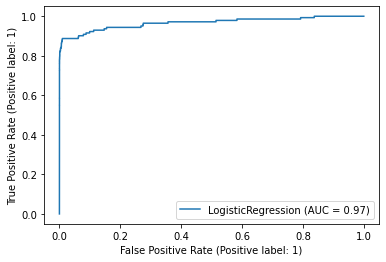

In [55]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');

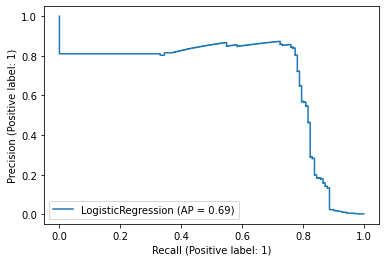

In [56]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

***v. Apply and Plot StratifiedKFold***

*Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

In [58]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    log_model.fit(xtr,ytr)
    score = roc_auc_score(yvl,log_model.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = log_model.predict_proba(X_test_scaled)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.9136114328464489
2 of KFold 10
ROC AUC score: 0.9501863561182043
3 of KFold 10
ROC AUC score: 0.9504687821578851
4 of KFold 10
ROC AUC score: 0.8945307443365695
5 of KFold 10
ROC AUC score: 0.9383862900853192
6 of KFold 10
ROC AUC score: 0.941987349220359
7 of KFold 10
ROC AUC score: 0.9168763027924358
8 of KFold 10
ROC AUC score: 0.9399710803552984
9 of KFold 10
ROC AUC score: 0.9374821130119622
10 of KFold 10
ROC AUC score: 0.9512095547501457


In [59]:
print('Confusion matrix\n',confusion_matrix(yvl,log_model.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[27369   956]
 [    3    44]]
Cv [0.9136114328464489, 0.9501863561182043, 0.9504687821578851, 0.8945307443365695, 0.9383862900853192, 0.941987349220359, 0.9168763027924358, 0.9399710803552984, 0.9374821130119622, 0.9512095547501457] 
Mean cv Score 0.9334710005674627


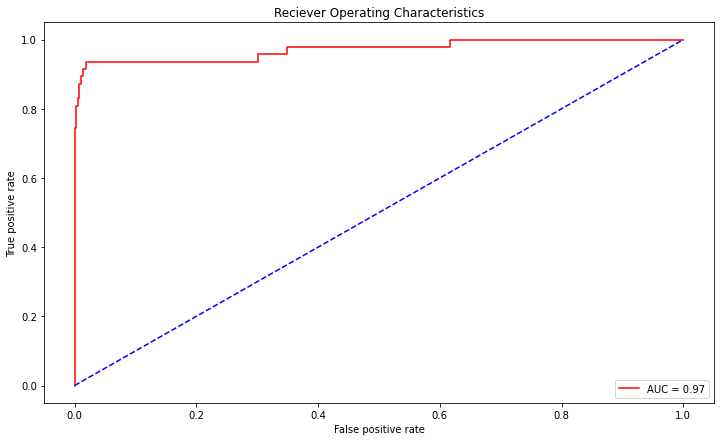

In [60]:
proba = log_model.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(12,7))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate');

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [61]:
!pip install imblearn

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
df["class"].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [64]:
from imblearn.pipeline import Pipeline

In [65]:
#Oversampling the data
smote = SMOTE(random_state = 42)

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [66]:
X, y = smote.fit_resample(df.drop("class",axis=1), df['class'])#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = df.drop("class",axis=1).columns)
y.value_counts()

0    283253
1    283253
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

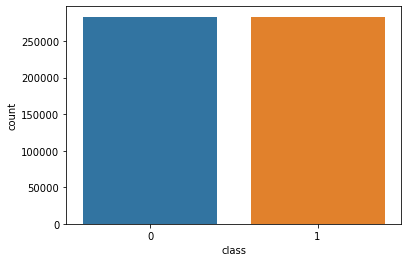

In [67]:
sns.countplot(y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [70]:
log_smodel = LogisticRegression(random_state=42)

In [71]:
log_smodel.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [72]:
log_smodel.coef_

array([[-0.48987517,  6.9516097 ,  3.52640596,  4.05826387,  2.34138237,
         4.97038335, -1.30794716, -6.75408662, -1.95305848, -1.48056752,
        -4.70620274,  2.10082675, -7.57008168, -0.4802984 , -9.6482886 ,
        -0.24174488, -4.2943878 , -9.98065783, -1.1921108 ,  0.66408265,
        -1.41715576, -0.10870895,  0.86067466,  1.07483883,  0.04565106,
         0.07249195, -0.1196713 ,  0.01187141,  0.60028166,  3.15852501]])

***iii. Prediction and Model Evaluating***

In [73]:
y_pred = log_smodel.predict(X_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [74]:
smote_df = pd.DataFrame(y_test)

In [75]:
smote_df["pred"] = y_pred
smote_df

,class,pred
74990,0,0
545510,1,1
407331,1,1
46948,0,0
415432,1,1
...,...,...
473798,1,1
146767,0,0
257171,0,0
38623,0,0


test scores 
--------------
[[84184   792]
 [ 2814 82162]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     84976
           1       0.99      0.97      0.98     84976

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952



train scores 
--------------
[[196496   1781]
 [  6667 191610]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    198277
           1       0.99      0.97      0.98    198277

    accuracy                           0.98    396554
   macro avg       0.98      0.98      0.98    396554
weighted avg       0.98      0.98      0.98    396554



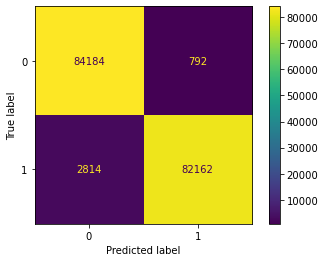

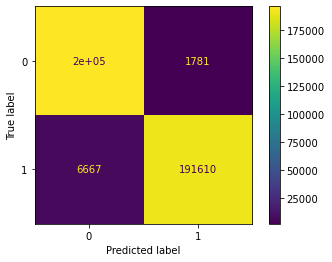

In [76]:
y_pred = log_smodel.predict(X_test_scaled)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(log_smodel,X_test_scaled,y_test,values_format='.0f')
print()
print()

y_pred = log_smodel.predict(X_train_scaled)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(log_smodel,X_train_scaled,y_train);

In [105]:
scores = cross_val_score(log_smodel, X_train_scaled, y_train, cv=10, scoring="precision")
print('Cross-Validation Mean of precision Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of precision Scores 0.9908116167711167

[0.99059723 0.99042988 0.991721   0.99063777 0.99136058 0.98993289
 0.99083804 0.99094625 0.99094718 0.99070536]


***iv.  Plot Precision and Recall Curve***


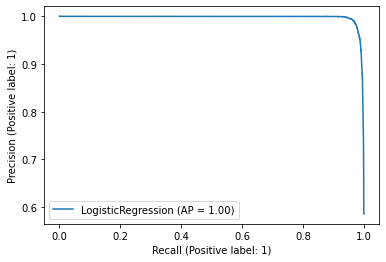

In [77]:
plot_precision_recall_curve(log_smodel, X_test_scaled, y_test);

***v. Apply and Plot StratifiedKFold***

In [78]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    log_smodel.fit(xtr,ytr)
    score = roc_auc_score(yvl,log_smodel.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = log_smodel.predict_proba(X_test_scaled)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.9563465574403278
2 of KFold 10
ROC AUC score: 0.9556228132936417
3 of KFold 10
ROC AUC score: 0.9705740627079286
4 of KFold 10
ROC AUC score: 0.9564175571780305
5 of KFold 10
ROC AUC score: 0.9723748870404899
6 of KFold 10
ROC AUC score: 0.9563822520535246
7 of KFold 10
ROC AUC score: 0.9696734333627537
8 of KFold 10
ROC AUC score: 0.969973521624007
9 of KFold 10
ROC AUC score: 0.968667255075022
10 of KFold 10
ROC AUC score: 0.9700441306266548


In [79]:
print('Confusion matrix\n',confusion_matrix(yvl,log_smodel.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[27778   547]
 [ 1150 27175]]
Cv [0.9563465574403278, 0.9556228132936417, 0.9705740627079286, 0.9564175571780305, 0.9723748870404899, 0.9563822520535246, 0.9696734333627537, 0.969973521624007, 0.968667255075022, 0.9700441306266548] 
Mean cv Score 0.9646076470402379


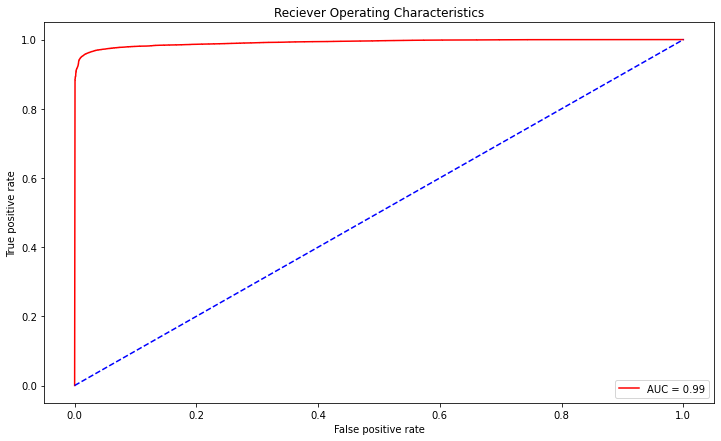

In [80]:
proba = log_smodel.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(12,7))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate');

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_model = RandomForestClassifier(random_state=42)

In [92]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

***ii. Prediction and Model Evaluating***

test scores 
--------------
[[84960    16]
 [    0 84976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



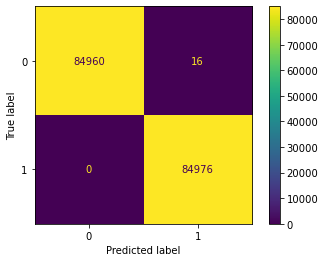

In [93]:
y_pred = rf_model.predict(X_test_scaled)

print("test scores","\n--------------")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rf_model,X_test_scaled,y_test,values_format='.0f');

train scores 
--------------
[[198277      0]
 [     0 198277]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       1.00      1.00      1.00    198277

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554



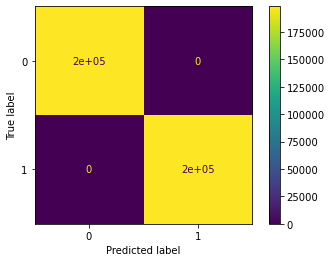

In [94]:
y_pred = rf_model.predict(X_train_scaled)
print("train scores","\n--------------")
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train, y_pred))
plot_confusion_matrix(rf_model,X_train_scaled,y_train);

In [95]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
model = RandomForestClassifier(random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [98]:
rf_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [99]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [100]:
y_pred = rf_grid_model.predict(X_test_scaled)
y_train_pred = rf_grid_model.predict(X_train_scaled)
rf_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[84819   157]
 [ 2179 82797]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     84976
           1       1.00      0.97      0.99     84976

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952



,train_set,test_set
Accuracy,0.986035,0.986255
Precision,0.998459,0.998107
Recall,0.973572,0.974357
f1,0.985858,0.986089


***iii. Plot Precision and Recall Curve***


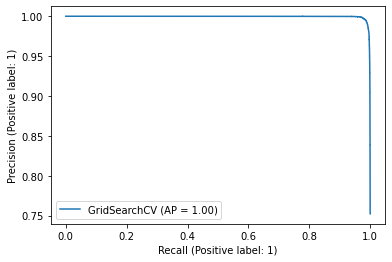

In [101]:
plot_precision_recall_curve(rf_grid_model, X_test_scaled, y_test);

***iv. Apply and Plot StratifiedKFold***

In [103]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    rf_str = RandomForestClassifier(max_depth= 9, max_features= 4,min_samples_split = 2, n_estimators = 300)
    rf_str.fit(xtr,ytr)
    score = roc_auc_score(yvl,rf_str.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = rf_str.predict_proba(X_test_scaled)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.9852957038649555
2 of KFold 10
ROC AUC score: 0.9855251787612876
3 of KFold 10
ROC AUC score: 0.9862842274092976
4 of KFold 10
ROC AUC score: 0.9858257063657845
5 of KFold 10
ROC AUC score: 0.9864435145739501
6 of KFold 10
ROC AUC score: 0.9852608623877874
7 of KFold 10
ROC AUC score: 0.9857899382171227
8 of KFold 10
ROC AUC score: 0.9852074139452781
9 of KFold 10
ROC AUC score: 0.985189761694616
10 of KFold 10
ROC AUC score: 0.9861076787290379


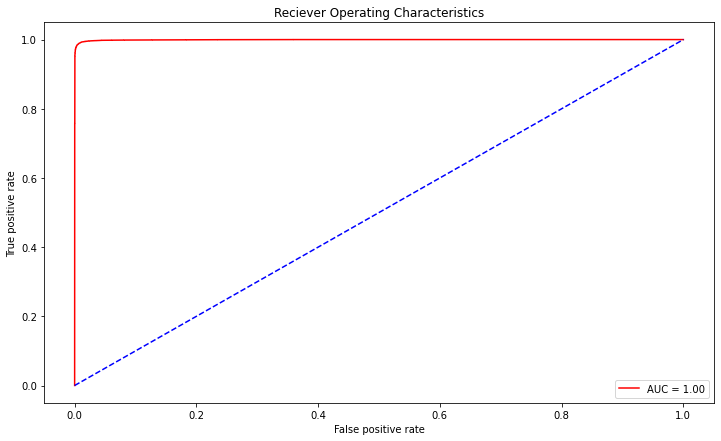

In [106]:
proba = rf_str.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(12,7))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate');

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout

***ii. Define Model***

***iii. Compile Model***

In [108]:
X = df.drop("class",axis=1)
y = df["class"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=42)

In [110]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
d_model = Sequential()

d_model.add(Dense(16, activation="relu"))
d_model.add(Dropout(0.25))
d_model.add(Dense(8, activation="relu"))
d_model.add(Dropout(0.25))
d_model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
d_model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [113]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [115]:
from sklearn.utils import class_weight

In [116]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008346908617742, 1: 300.012084592145}

***iv. Fit Model***

In [118]:
d_model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
1397/1397 [==============================] - 6s 4ms/step - loss: 0.4771 - recall: 0.7407 - val_loss: 0.3065 - val_recall: 0.8235
Epoch 2/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.2875 - recall: 0.8552 - val_loss: 0.1968 - val_recall: 0.8235
Epoch 3/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.2151 - recall: 0.8788 - val_loss: 0.1288 - val_recall: 0.8529
Epoch 4/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.1745 - recall: 0.9057 - val_loss: 0.0906 - val_recall: 0.8529
Epoch 5/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.1621 - recall: 0.8990 - val_loss: 0.0874 - val_recall: 0.8824
Epoch 6/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.1631 - recall: 0.9091 - val_loss: 0.0894 - val_recall: 0.8824
Epoch 7/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.1463 - recall: 0.9226 - val_loss: 0.0584 - val_recall: 0.8529
Epoch 8/200
1

Epoch 59/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0375 - recall: 0.9966 - val_loss: 0.0189 - val_recall: 0.8529
Epoch 60/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0445 - recall: 0.9899 - val_loss: 0.0219 - val_recall: 0.8529
Epoch 61/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0412 - recall: 0.9865 - val_loss: 0.0227 - val_recall: 0.8529
Epoch 62/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0342 - recall: 0.9966 - val_loss: 0.0191 - val_recall: 0.8529
Epoch 63/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0459 - recall: 0.9899 - val_loss: 0.0194 - val_recall: 0.8529
Epoch 64/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0354 - recall: 1.0000 - val_loss: 0.0213 - val_recall: 0.8529
Epoch 65/200
1397/1397 [==============================] - 2s 2ms/step - loss: 0.0377 - recall: 0.9933 - val_loss: 0.0180 - val_recall: 0.8529
Epoch 

In [121]:
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

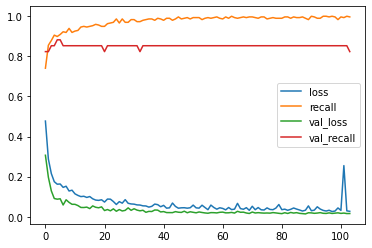

In [119]:
loss_df = pd.DataFrame(d_model.history.history)
loss_df.plot()

***v. Prediction and Model Evaluating***

In [124]:
y_pred = (d_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84753   223]
 [   25   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.34      0.82      0.49       142

    accuracy                           1.00     85118
   macro avg       0.67      0.91      0.74     85118
weighted avg       1.00      1.00      1.00     85118



In [137]:
y_pred.shape

(85118, 1)

In [139]:
y_pred = y_pred.reshape((1,85118))

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

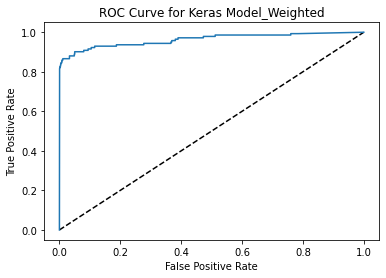

In [141]:
y_pred_proba = d_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()


***vi. Plot Precision and Recall Curve***

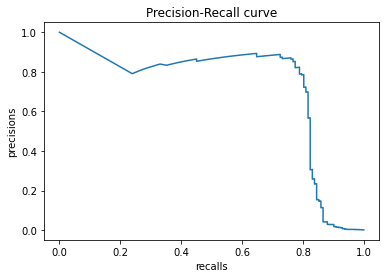

In [144]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [142]:
average_precision_score(y_test, y_pred_proba)

0.6972207989021646

### GridSearch with DL Model

In [146]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [145]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [148]:
classifier = KerasClassifier(build_fn=build_classifier, epochs=150)
parameters = {
    'batch_size': [128, 256],
    'optimizer': ['Adam', 'rmsprop', "SGD", "adagrad", "adadelta"]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

Epoch 1/150
1552/1552 [==============================] - 11s 3ms/step - loss: 1.1271 - recall: 0.0574
Epoch 2/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.9036 - recall: 0.1027
Epoch 3/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.8130 - recall: 0.1420
Epoch 4/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.7606 - recall: 0.1934
Epoch 5/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.7283 - recall: 0.2236
Epoch 6/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.7057 - recall: 0.2749
Epoch 7/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.6884 - recall: 0.3112
Epoch 8/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.6748 - recall: 0.3565
Epoch 9/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.6635 - recall: 0.3897: 0s - loss: 0.6503 - 
Epoch 10/150
1552/1552 [==============================] - 2s 2ms/ste

1552/1552 [==============================] - 2s 1ms/step - loss: 0.3250 - recall: 0.8882
Epoch 81/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.3164 - recall: 0.8882
Epoch 82/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.3088 - recall: 0.8882
Epoch 83/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.3018 - recall: 0.8882
Epoch 84/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.2954 - recall: 0.8882
Epoch 85/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.2896 - recall: 0.8882
Epoch 86/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.2843 - recall: 0.8882
Epoch 87/150
1552/1552 [==============================] - 3s 2ms/step - loss: 0.2796 - recall: 0.8882
Epoch 88/150
1552/1552 [==============================] - 2s 1ms/step - loss: 0.2752 - recall: 0.8882
Epoch 89/150
1552/1552 [==============================] - 2s 2ms/step - loss: 0.2712 - recall: 

In [149]:
grid_model.best_score_

0.8958438660453165

In [150]:
grid_model.best_params_

{'batch_size': 128, 'optimizer': 'adagrad'}

In [151]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82484  2492]
 [   17   125]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



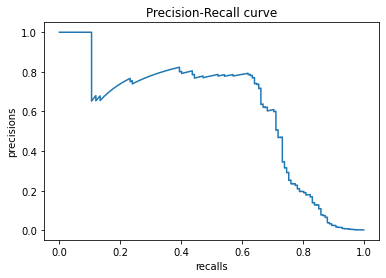

In [152]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [153]:
average_precision_score(y_test, y_pred_proba)

0.6022446767357689

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___